# 6. Slope graphs

You might never have used a slope graph before, but you probably have seen them before.
Slope graphs are not commonly included in visualization packages, but they are great tools to tell a story.
These types of visualizations show how values change, possibly as a result of time or an action.

In this notebook, we will go through a simple example that will show you one application for slope graphs: plotting the popularity of different energy sources over 20 years.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

The slope graph example uses data from [the International Energy Agency](https://www.iea.org/data-and-statistics?country=EU28&fuel=Energy%20supply&indicator=Electricity%20generation%20by%20source), showing how the energy sources in the European Union changed from 1998 to 2018.

Changes over time, like this one, are a common use case for slope graphs.
A time series can illustrate the same thing, but the message tends to get muddled up.
As we'll see in this notebook, the slope graph's message is more direct.

As usual, first we read the data.
The included dataset contains information about energy sources from the European Union in 1998 and 2018.

The dataset has several energy sources, but we ignore those that are barely used.

In [2]:
# load the data
df = pd.read_csv('data/energy-changes.csv')
df = df.set_index('Source')
df = df[ df.max(axis=1) > 1e5 ]
df = df[[ '1998', '2018' ]]
df = df.sort_values(by='1998', ascending=False)
df = df.fillna(0)
df

,1998,2018
Source,,
Coal,943992.0,660266
Nuclear,932851.0,827007
Natural gas,392921.0,622935
Hydro,374215.0,378639
Oil,220936.0,55909
Biofuels,23446.0,168115
Wind,11273.0,377423
Solar PV,0.0,122972


Since we've already loaded the data, it's time to draw the slope graph!
We follow the usual pattern:

1. We import the Drawable and the style,
2. We define a general style for all slopes, and
3. We draw the slopes.

When we draw a slope graph, the function automatically styles the plot for us, making these changes:

1. It removes the y-axes from the left and right,
2. It restricts the x-axis to be between 0 and 1, and
3. It removes the grid.

> Do you want to style the plot yourself? Disable the automatic styling by passing on `style_plot=False` to the `draw_slope` function.

Slopes have a start value and an end value, which we provide to the `draw_slope` function.
You can draw each slope separately, or you can provide a list of start values and another list of end values.
As usual, Multiplex uses any other keyword arguments to style the plot.

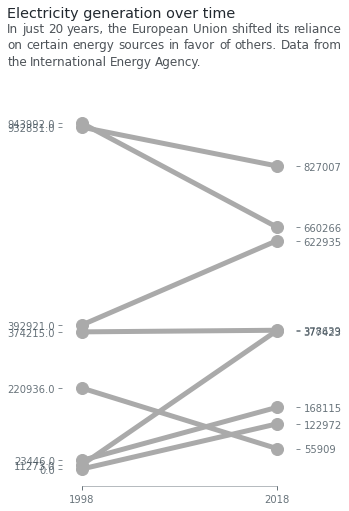

In [3]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a general style
style = { 'color': '#AAAAAA', 'linewidth': 5,
          'marker': 'o', 'markersize': 12 }

# draw the visualization
figure = plt.figure(figsize=(6, 7))
viz = drawable.Drawable(figure)
viz.draw_slope(y1=df['1998'], y2=df['2018'], **style)

# finalize the plot
viz.set_title('Electricity generation over time', loc='left')
viz.set_caption("""In just 20 years, the European Union shifted its reliance on certain energy sources in favor of others.
                   Data from the International Energy Agency.""", align='justify')
viz.set_xticklabels([ '1998', '2018' ])
viz.show()

Those ticks look a bit messy, don't they?
Don't worry, you can control what ticks to show very easily.

When drawing slope graphs, the next two parameters determine what ticks _and_ labels to show.
The first parameter after the slopes is the ticks on the left, and the second parameter is the ticks on the right.

In general, you can pass four different types of values for ticks:

1. `None` (default), which uses the values as ticks;
2. Empty string, which adds no ticks;
3. A string, a number, or any other value (if you only have one slopes); or
4. A list, which can include `None`, empty strings or any other values, corresponding to each slope as above.

The previous visualization used `None`, which is why all points had their own ticks.
In the next example, we provide the ticks manually and show only every other tick.
In addition, instead of providing `None`, which would use the tick, we pass on a string with the energy unit.

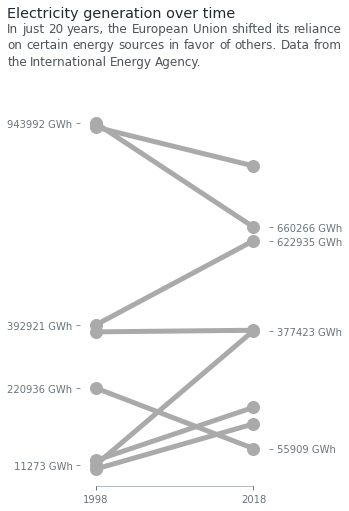

In [4]:
#  set the style
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# draw a tick for only even-number energy sources
left_ticks = [ f"{ int(value) } GWh" if not i % 2 else '' for i, value in enumerate(df['1998'])  ]
right_ticks = [ f"{ int(value) } GWh" if not i % 2 else '' for i, value in enumerate(df['2018'])  ]

# if you prefer to show the value without the unit, use `None` instead of a string.
# left_ticks = [ None if not i % 2 else '' for i, value in enumerate(df['1998'])  ]
# right_ticks = [ None if not i % 2 else '' for i, value in enumerate(df['2018'])  ]

# draw the visualization
figure = plt.figure(figsize=(6, 7))
viz = drawable.Drawable(figure)
viz.draw_slope(y1=df['1998'], y2=df['2018'], y1_tick=left_ticks, y2_tick=right_ticks, **style)

# finalize the plot
viz.set_title('Electricity generation over time', loc='left')
viz.set_caption("""In just 20 years, the European Union shifted its reliance on certain energy sources in favor of others.
                   Data from the International Energy Agency.""", align='justify')
viz.set_xticklabels([ '1998', '2018' ])
viz.show()

> Notice how there are no ticks for odd-numbered energy sources.
  And had we provided `None` instead of strings, Multiplex would have added the actual values as ticks.
  Go ahead and try it by removing the lines that are commented-out!

That's more readable, isn't it?
But there is one thing that is still missing: we don't know what energy source each slope corresponds to.

We can fix that by providing labels.
In general, you can pass three different types of values for labels:

1. `None` or an empty string (default), which adds no ticks;
2. A string (if you only have one slopes); or
3. A list, which can include `None`, empty strings or strings, corresponding to each slope as above.

By default, Multiplex adds labels to both sides of the slopes.
You can specify the label position yourself by passing `left`, `right` or `both` as the `where` parameter.
In addition, you can also provide a list of positions: one for each label.

Finally, you can style the labels using the `label_style` parameter.

In the next visualization, we use labels to give names to our slopes.
Multiplex automatically ensures that your labels do not overlap so they remain readable.

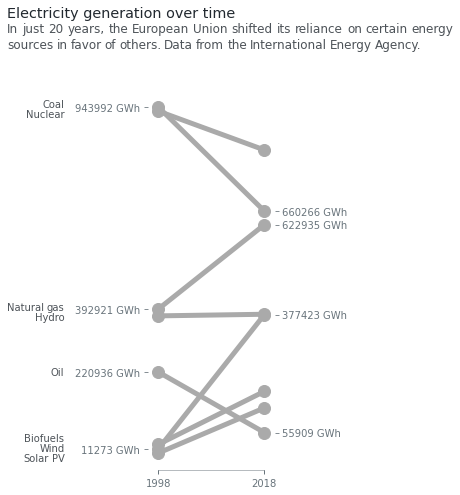

In [5]:
# set the style
from multiplex import drawable
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a custom style for labels
label_style = { 'fontsize': 'small', 'alpha': 0.8 }

# draw a tick for only even-number energy sources
left_ticks = [ f"{ int(value) } GWh" if not i % 2 else '' for i, value in enumerate(df['1998'])  ]
right_ticks = [ f"{ int(value) } GWh" if not i % 2 else '' for i, value in enumerate(df['2018'])  ]

# draw the visualization
figure = plt.figure(figsize=(8, 7))
viz = drawable.Drawable(figure)
viz.draw_slope(y1=df['1998'], y2=df['2018'], y1_tick=left_ticks, y2_tick=right_ticks,
              label=df.index, where='left', label_style=label_style, **style)

# finalize the plot
viz.set_title('Electricity generation over time', loc='left')
viz.set_caption("""In just 20 years, the European Union shifted its reliance on certain energy sources in favor of others.
                   Data from the International Energy Agency.""", align='justify')
viz.set_xticklabels([ '1998', '2018' ])
viz.show()

We can keep drawing slopes like these as many times as we want.
You can use this to tell a better story.
In the last step of this visualization, we show how data shows progress in how we generate energy!

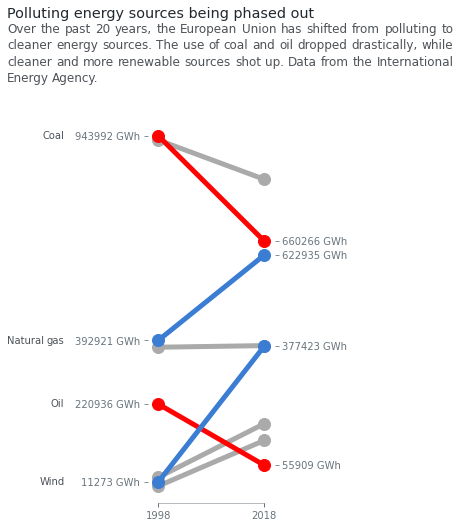

In [6]:
# set the style
from multiplex import drawable
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a custom style for highlighted slopes
positive, negative = [ 'Wind', 'Natural gas' ], [ 'Coal', 'Oil' ]
positive_style, negative_style = dict(style), dict(style)
positive_style.update({ 'color': '#3A7DD3' })
negative_style.update({ 'color': '#FF0303' })

# choose the data to highlight
normal = df[ ~(df.index.isin(positive) | df.index.isin(negative)) ]
positive = df[ df.index.isin(positive) ]
negative = df[ df.index.isin(negative) ]

# only show ticks for the highlighted slopes
positive_y1_ticks = [ f"{ int(value) } GWh" for value in positive['1998']  ]
positive_y2_ticks = [ f"{ int(value) } GWh" for value in positive['2018']  ]
negative_y1_ticks = [ f"{ int(value) } GWh" for value in negative['1998']  ]
negative_y2_ticks = [ f"{ int(value) } GWh" for value in negative['2018']  ]

# draw the visualization
figure = plt.figure(figsize=(8, 7))
viz = drawable.Drawable(figure)
viz.draw_slope(y1=normal['1998'], y2=normal['2018'], y1_tick='', y2_tick='', **style)
viz.draw_slope(y1=negative['1998'], y2=negative['2018'],
               label=negative.index, label_style=label_style, where='left',
               y1_tick=negative_y1_ticks, y2_tick=negative_y2_ticks, **negative_style)
viz.draw_slope(y1=positive['1998'], y2=positive['2018'],
               label=positive.index, label_style=label_style, where='left',
               y1_tick=positive_y1_ticks, y2_tick=positive_y2_ticks, **positive_style)

# finalize the plot
viz.set_title('Polluting energy sources being phased out', loc='left')
viz.set_caption("""Over the past 20 years, the European Union has shifted from polluting to cleaner energy sources.
                   The use of coal and oil dropped drastically, while cleaner and more renewable sources shot up.
                   Data from the International Energy Agency.""", align='justify')
viz.set_xticklabels([ '1998', '2018' ])
viz.savefig('exports/6-slope.png', dpi=300, bbox_inches='tight')

You can learn more about bar chart visualizations, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/slope.html).